Properties of CIs convering Pop Mean 0.97


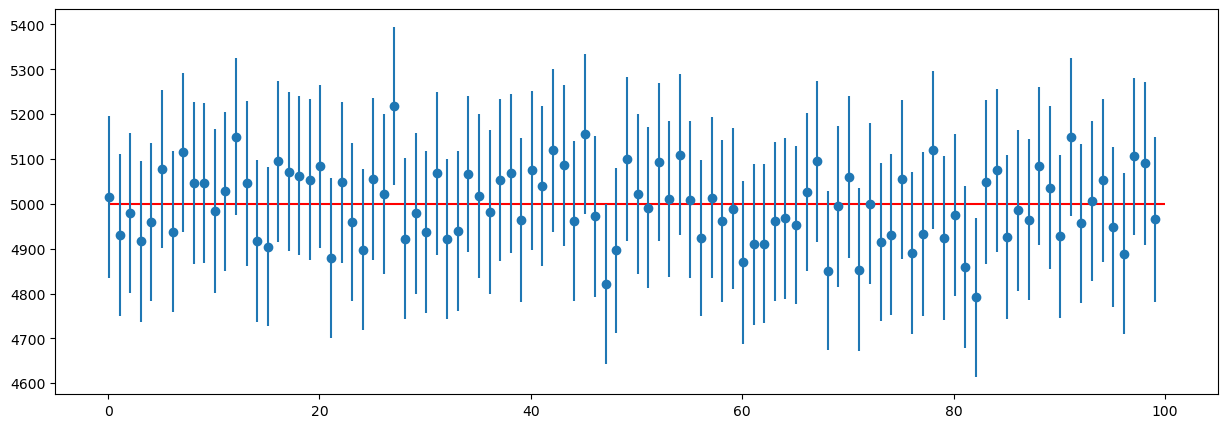

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import random

population = np.arange(1,10**4)
pop_mean=np.mean(population)

def sampling(sample_size,no_of_samples):
    sample_means=[]
    intervals=[]
    count=0
    for i in range(no_of_samples):
        sample=random.sample(list(population),sample_size)
        sample_means.append(np.mean(sample))
        ci=norm.interval(0.95,np.mean(sample),np.std(sample,ddof=1)/sqrt(sample_size))
        intervals.append(ci)
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count=count+1
    print("Properties of CIs convering Pop Mean",count/no_of_samples)
    plt.figure(figsize=(15,5))

    plt.hlines(y=pop_mean,xmin=0,xmax=100,color='r')

    plt.errorbar(np.arange(0.1,100,1),sample_means,fmt='o',yerr=[(upp-low)/2 for low, upp in intervals])
    plt.show()
    
sampling(1000,100)
        
    
    
# %matplotlib inline
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from math import sqrt
# from scipy.stats import norm
# import random


# population =np.arange(1,10**4)
# pop_mean= np.mean(population)

# def sampling(sample_size, no_of_sample):
#     sample_means=[]
#     intervals=[]
#     count=0
#     for i in range(no_of_sample):
#         sample=random.sample(list(population), sample_size)
#         sample_means.append(np.mean(sample))
#         ci=norm.interval(0.95, np.mean(sample),np.std(sample, ddof=1)/sqrt(sample_size))
#         intervals.append(ci)
        
#         if pop_mean>= ci[0] and pop_mean<=ci[1]:
#             count=count+1
            
#     print('proportion of CIs covering pop mean', count/no_of_sample)
#     plt.figure(figsize=(15,5))
    
#     plt.hlines(y=pop_mean, xmin=0, xmax=100, color='r')
    
#     plt.errorbar(np.arange(0.1, 100, 1), sample_means, fmt='o',yerr=[(upp-low)/2 for low, upp in intervals])
#     plt.show()
    
# sampling(1000,100)

In [17]:
# CI for population whre 85% of the people say YES to a certain question
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats as st
import math

def CI(pop, ci, samp_size, no_of_samples):
    print("\nfor ci of", ci, "sample_size", samp_size)
    pop_mean=np.mean(pop)
    print('actual mean: ',pop_mean)
    
    samp_means=[]
    for i in range(no_of_samples):
        samp_means.append(np.mean(sample(pop, samp_size)))
        
    print('mean of samples: ',np.mean(samp_means))
    pop_stdev=np.std(samp_means)/math.sqrt(samp_size)
    z=st.norm.ppf(ci)
    print('confidence interval: ',pop_mean,'+-',z*pop_stdev)
    plt.hist(samp_means)
    plt.show()
    
pop=sample(range(1,2*10**5),10**4)

In [ ]:
# 7/11/2023---Tuesday---3rd period

In [3]:
from scipy.stats import norm
from math import sqrt

def two_sided_hypo(samle_mean,pop_mean,std_dev,sample_size,alpha):
    actual_z=abs(norm.ppf(alpha/2))
    hypo_z=(sample_mean-pop_mean)/(std_dev/sqrt(sample_size))
    print('actual z value:',actual_z)
    print('hypothesis z value:',hypo_z,'\n')
    if hypo_z >=actual_z or hypo_z <= -(actual_z):
        return True
    else:
        return False
    
alpha =0.05
sample_mean=585
pop_mean=558
sample_size=100
std_dev=139

print('H0: u=',pop_mean)
print('H1: u !=',pop_mean)
print('alpha value is:',alpha,'\n')

reject=two_sided_hypo(sample_mean,pop_mean,std_dev,sample_size,alpha)
if reject:
    print(' Reject NULL hypothesis')
else:
    print('Fail to Reject NULL Hypothesis')

H0: u= 558
H1: u != 558
alpha value is: 0.05 

actual z value: 1.9599639845400545
hypothesis z value: 1.9424460431654675 

Fail to Reject NULL Hypothesis


In [4]:
from scipy.stats import norm
from math import sqrt

def one_sided_hypo(samle_mean,pop_mean,std_dev,sample_size,alpha):
    actual_z=abs(norm.ppf(alpha))
    hypo_z=(sample_mean-pop_mean)/(std_dev/sqrt(sample_size))
    print('actual z value:',actual_z)
    print('hypothesis z value:',hypo_z,'\n')
    if hypo_z >=actual_z :
        return True
    else:
        return False
    
alpha =0.05
sample_mean=585
pop_mean=558
sample_size=100
std_dev=139


print('H0: u=',pop_mean)
print('H1: u !=',pop_mean)
print('alpha value is:',alpha,'\n')

reject=one_sided_hypo(sample_mean,pop_mean,std_dev,sample_size,alpha)
if reject:
    print(' Reject NULL hypothesis')
else:
    print('Fail to Reject NULL Hypothesis')

H0: u= 558
H1: u != 558
alpha value is: 0.05 

actual z value: 1.6448536269514729
hypothesis z value: 1.9424460431654675 

 Reject NULL hypothesis


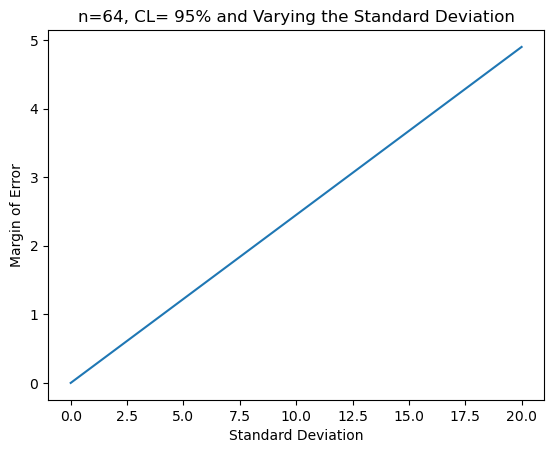

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

z_score=1.96
n=64

moe=[]
x=range(0,21)

for sd in x:
    moe.append(z_score * sd/math.sqrt(n))
plt.plot(x,moe)
plt.title('n=64, CL= 95% and Varying the Standard Deviation')
plt.ylabel('Margin of Error')
plt.xlabel('Standard Deviation')
plt.show()

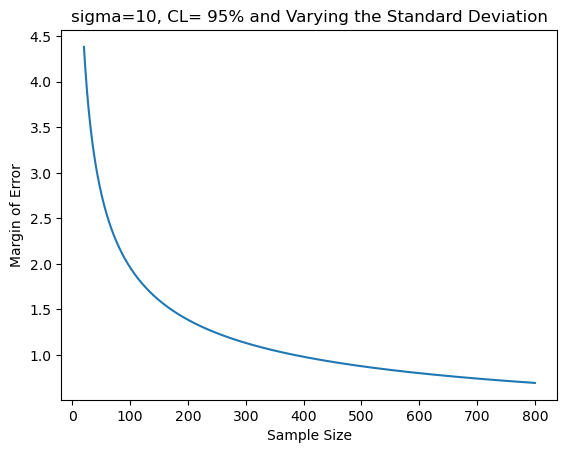

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

z_score=1.96
sigma=10

moe=[]
x=range(20,801)

for n in x:
    moe.append(z_score * sigma/math.sqrt(n))
plt.plot(x,moe)
plt.title('sigma=10, CL= 95% and Varying the Standard Deviation')
plt.ylabel('Margin of Error')
plt.xlabel('Sample Size')
plt.show()

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

z_score=1.96
sigma=10
n=64

def prob(z1,z2):
    return (norm.cdf(z2)-norm.cdf(z1))

z_alphaby2=np.linspace(norm.ppf(0.10),norm.ppf(0.0005),100)
z_alphaby2=z_alphaby2 * -1

moe=z_alphaby2 *sigma/math.sqrt(n)

x=[]
for i in range(0,len(z_alphaby2)):
    x.append(prob(-1 * z_alphaby2[i],z_alphaby2[i]))

x=np.array(x)*100


NameError: name 'plot' is not defined